In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/Admin/Downloads/train.csv')
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


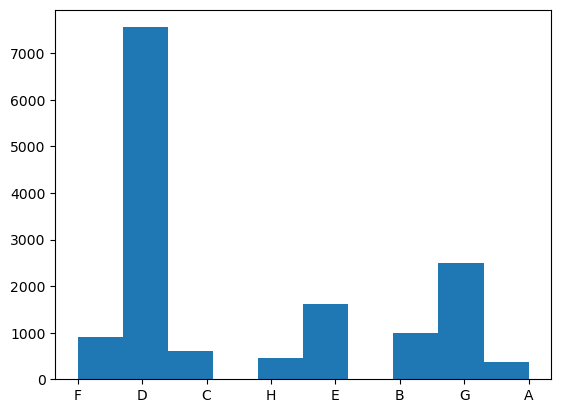

In [3]:
plt.hist(df['category'])
plt.show()

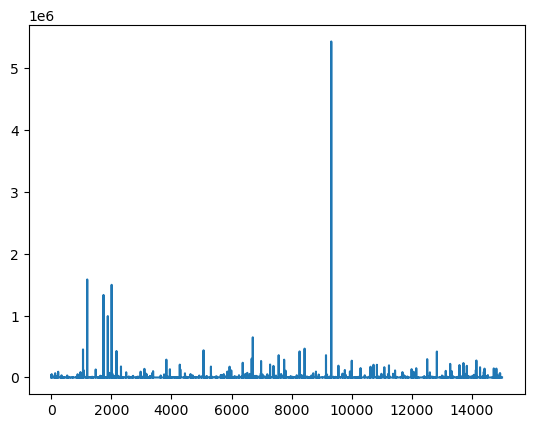

In [4]:
plt.plot(df['adview'])
plt.show() #shows the presence of outliers

In [5]:
df=df[df['adview'] < 2000000]

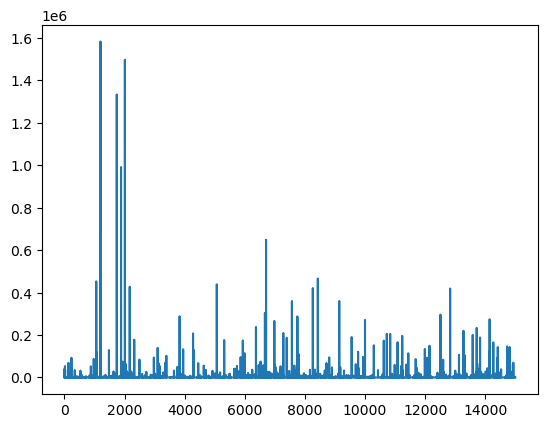

In [6]:
plt.plot(df['adview'])
plt.show()

In [7]:
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14998 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14998 non-null  object
 1   adview     14998 non-null  int64 
 2   views      14998 non-null  object
 3   likes      14998 non-null  object
 4   dislikes   14998 non-null  object
 5   comment    14998 non-null  object
 6   published  14998 non-null  object
 7   duration   14998 non-null  object
 8   category   14998 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.1+ MB


In [10]:
df=df[df.views!='F']
df=df[df.likes!='F'] #Removing 'F data in dataset'
df=df[df.dislikes!='F']
df=df[df.comment!='F']
df.head()

category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8} #removing categorical letters with numbers
df["category"]=df["category"].map(category)
df['category']

0        6
1        4
2        3
3        8
4        4
        ..
14994    1
14995    4
14996    2
14997    7
14998    4
Name: category, Length: 14636, dtype: int64

In [11]:
df['views'] = pd.to_numeric(df['views'])
df['comment'] = pd.to_numeric(df['comment'])
df['likes'] = pd.to_numeric(df['likes'])
df['dislikes'] = pd.to_numeric(df['dislikes'])
df['adview'] = pd.to_numeric(df['adview'])

col_vidid = df['vidid']

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['duration'] = LE.fit_transform(df['duration'])
df['vidid'] = LE.fit_transform(df['vidid'])
df['published'] = LE.fit_transform(df['published'])
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9004,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


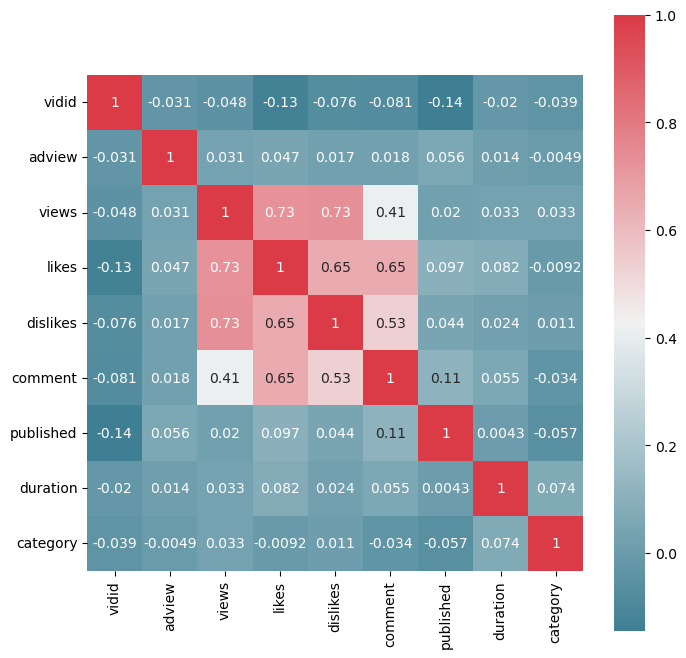

In [12]:
import seaborn as sns
f, ax = plt.subplots(figsize=(8, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

### Convert duration to seconds

In [13]:
import datetime
import time

In [14]:
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
        if(h==''):
            h = '00'
        if(m == ''):
            m = '00'
        if(s==''):
            s='00'
        bp = h+':'+m+':'+s
    return bp
    
train=pd.read_csv("C:/Users/Admin/Downloads/train.csv")
mp = pd.read_csv("C:/Users/Admin/Downloads/train.csv")["duration"]
time = mp.apply(checki)


In [15]:
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)
df["duration"]=time1   

In [16]:
df['duration']

0        457
1        570
2        136
3        262
4         31
        ... 
14994    370
14995    236
14996    193
14997     26
14998     61
Name: duration, Length: 14636, dtype: int64

In [20]:
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9004,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


In [17]:
Y_train = pd.DataFrame(data=df.iloc[:,1].values,columns=['target'])
df=df.drop(['adview'],axis=1)
df=df.drop(['vidid'],axis=1)
df.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,Y_train,test_size=0.2,random_state=42)

In [19]:
X_train.shape

(11708, 7)

In [20]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.fit_transform(X_test)

In [22]:
X_train.mean()

0.1739096800320488

In [23]:
from sklearn import metrics
def print_error(X_test,y_test,model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error',metrics.mean_absolute_error(y_test,prediction))
    print('Mean Squared Error',metrics.mean_squared_error(y_test,prediction))
    print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

In [24]:
#Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train,y_train)
print_error(X_test,y_test,linear_regression)

Mean Absolute Error 3707.3780058245334
Mean Squared Error 835663131.1210337
Root Mean Squared Error 28907.83857573986


In [25]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree =DecisionTreeRegressor()
decision_tree.fit(X_train,y_train)
print_error(X_test,y_test,decision_tree)

Mean Absolute Error 2743.523907103825
Mean Squared Error 895858100.4788251
Root Mean Squared Error 29930.888735198376


In [37]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error 3215.1878068464293
Mean Squared Error 579320173.6341711
Root Mean Squared Error 24069.070892624233


In [38]:
#Support Vector Regressor
from sklearn.svm import SVR
support_vector_regressor = SVR()
support_vector_regressor.fit(X_train,y_train)
print_error(X_test,y_test,support_vector_regressor)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error 1696.9438599505638
Mean Squared Error 833685776.029172
Root Mean Squared Error 28873.617300732723


In [43]:
# Artificial Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ann = Sequential([
    Dense(6, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(6, activation='relu'),
    Dense(1)
])

optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.mean_squared_error
ann.compile(optimizer=optimizer, loss=loss, metrics=["mean_squared_error"])


In [44]:
history = ann.fit(X_train,y_train,epochs=100)

Epoch 1/100


366/366 [==============================] - 3s 3ms/step - loss: 767406528.0000 - mean_squared_error: 767406528.0000
Epoch 2/100
366/366 [==============================] - 1s 3ms/step - loss: 767402496.0000 - mean_squared_error: 767402496.0000
Epoch 3/100
366/366 [==============================] - 1s 3ms/step - loss: 767394624.0000 - mean_squared_error: 767394624.0000
Epoch 4/100
366/366 [==============================] - 1s 3ms/step - loss: 767379392.0000 - mean_squared_error: 767379392.0000
Epoch 5/100
366/366 [==============================] - 1s 3ms/step - loss: 767353280.0000 - mean_squared_error: 767353280.0000
Epoch 6/100
366/366 [==============================] - 1s 3ms/step - loss: 767316736.0000 - mean_squared_error: 767316736.0000
Epoch 7/100
366/366 [==============================] - 1s 3ms/step - loss: 767270208.0000 - mean_squared_error: 767270208.0000
Epoch 8/100
366/366 [==============================] - 1s 3ms/step - loss: 767213632.0000 - mean_squared_erro

In [45]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 48        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
print_error(X_test,y_test,ann)

92/92 [==============================] - 0s 2ms/step
Mean Absolute Error 3156.296741114288
Mean Squared Error 829195717.162305
Root Mean Squared Error 28795.758666204732


In [47]:
import joblib
joblib.dump(support_vector_regressor,'support_vector_regressor_youtubeadview.pkl')

['support_vector_regressor_youtubeadview.pkl']

In [48]:
ann.save('ann.youtubeadview.h5')

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### According to the model implementation it is recommended to use SVM (Support Vector Machine) Algorithm